In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
Insurance_data = pd.read_csv("insurance.csv")

In [3]:
Insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
Insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
Insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
Insurance_data.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

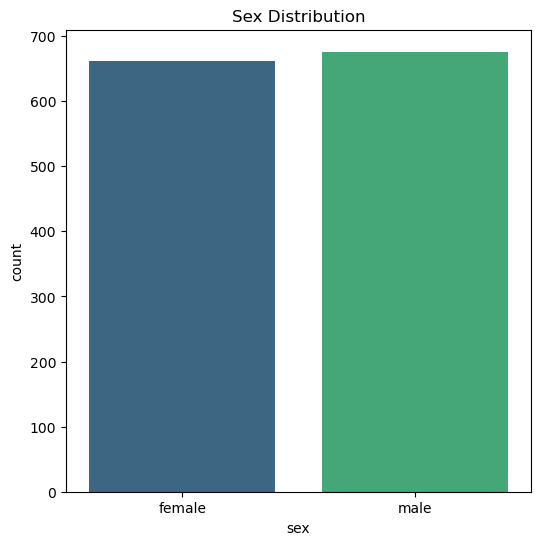

In [15]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=Insurance_data, palette='viridis')
plt.title('Sex Distribution')
plt.show()

In [8]:
Insurance_data.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

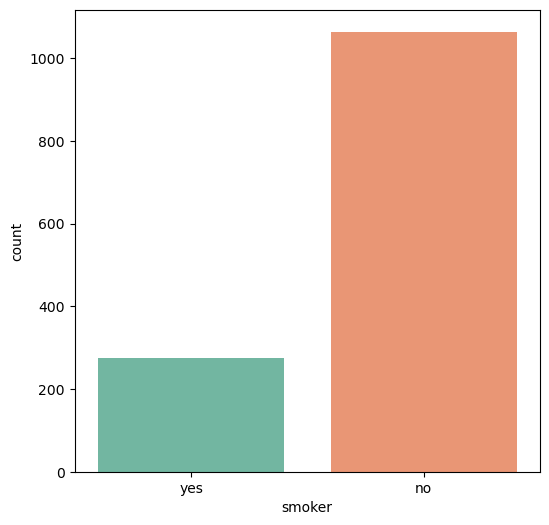

In [19]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=Insurance_data,palette='Set2')
plt.show()

In [20]:
Insurance_data.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

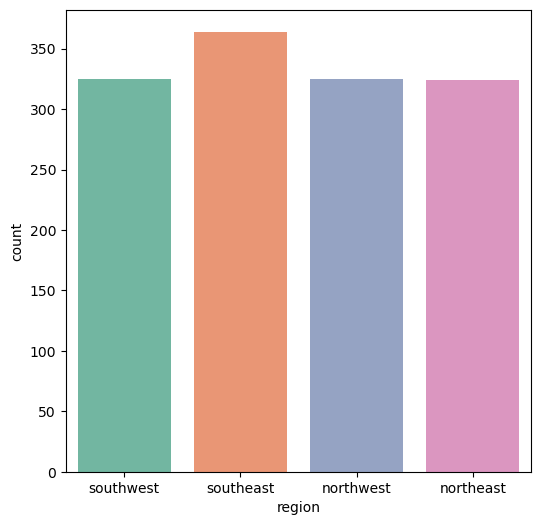

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=Insurance_data ,palette='Set2')
plt.show()

In [25]:
sns.set()

<Axes: xlabel='bmi', ylabel='Density'>

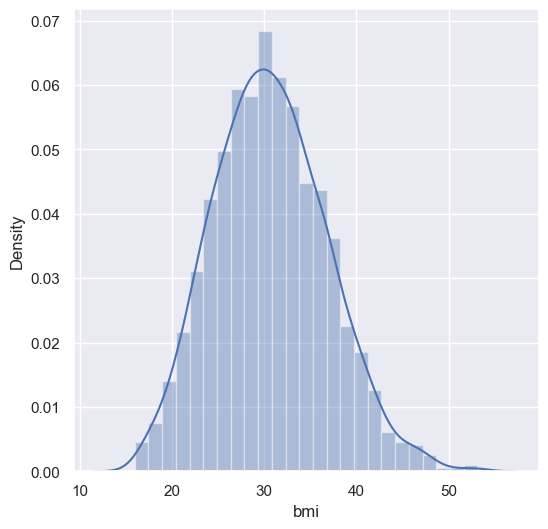

In [26]:
#bmi column
plt.figure(figsize=(6,6))
sns.distplot(Insurance_data['bmi'])

In [28]:
# Children column
Insurance_data.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

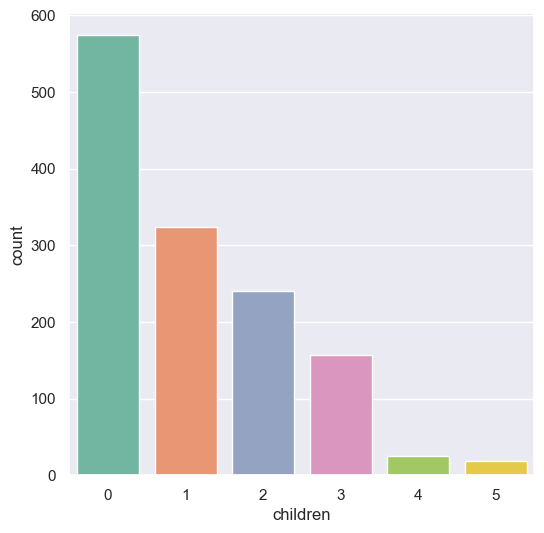

In [27]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=Insurance_data ,palette='Set2')
plt.show()

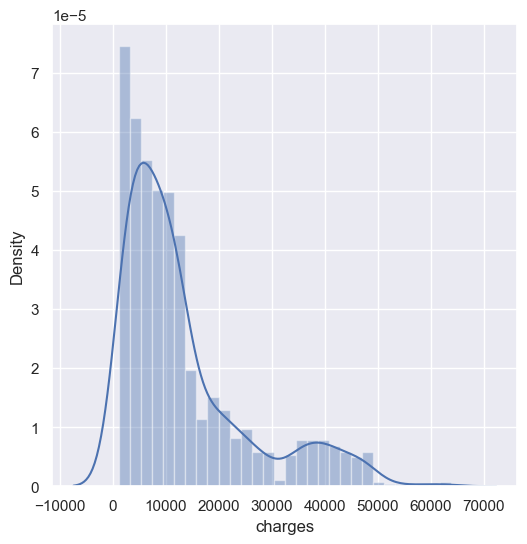

In [29]:
# charges column
plt.figure(figsize=(6,6))
sns.distplot(Insurance_data['charges'])
plt.show()

In [30]:
Insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Encoding

In [31]:
# encoding sex column
Insurance_data.replace({'sex':{'male':0,'female':1}}, inplace=True)

 # encoding 'smoker' column
Insurance_data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
Insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [32]:
Insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


## Segeregating X and y

In [33]:
X = Insurance_data.drop(columns='charges',axis =1)
y = Insurance_data.charges

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
print("X_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)

print("-"*30)

print("X_test shape :",X_test.shape)
print("y_test shape :",X_test.shape)

X_train shape : (1070, 6)
y_train shape : (1070,)
------------------------------
X_test shape : (268, 6)
y_test shape : (268, 6)


## Build Model

### Linear Regeression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()


In [42]:
model.fit(X_train,y_train)

LinearRegression()

In [43]:
# Prediction Training data
training_data_prediction = model.predict(X_train)

In [45]:
pd.DataFrame(training_data_prediction,columns=['Predicted'])

,Predicted
0,7268.839756
1,7978.774526
2,9111.244782
3,11058.254952
4,10253.816911
...,...
1065,4582.866086
1066,7556.504440
1067,11071.027587
1068,37565.496228


In [46]:
pd.DataFrame(y_train)

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


## Evaluation Metrics

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [52]:
print("Mean Absolute error :",mean_absolute_error(y_train,training_data_prediction))
print("Mean sqaured error :",mean_squared_error(y_train,training_data_prediction))
print("Root Mean sqaured error :",root_mean_squared_error(y_train,training_data_prediction))
print("R squared :",r2_score(y_train,training_data_prediction))

Mean Absolute error : 4214.89744476707
Mean sqaured error : 37337214.4107756
Root Mean sqaured error : 6110.418513553356
R squared : 0.7413131194887537


In [57]:
# Prediction Testing data
testing_data_prediction = model.predict(X_test)
pd.DataFrame(testing_train_prediction,columns=['Predicted'])

,Predicted
0,8597.284895
1,7231.743882
2,37039.232090
3,9616.212129
4,27161.155047
...,...
263,39017.518638
264,11922.482922
265,7316.166925
266,40853.403071


In [55]:
pd.DataFrame(y_test)

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180
...,...
109,47055.53210
575,12222.89830
535,6067.12675
543,63770.42801


In [58]:
print("R squared :",r2_score(y_test,testing_data_prediction))

R squared : 0.783021587162344


## Buliding Predictive System

In [61]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

predicted = model.predict(input_data_reshaped)
print(predicted)

[4016.99266999]
